In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import seaborn as sns
import pandas as pd
import gensim
import nltk
import re
import string
from curses.ascii import isprint
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
def clean_text(text):
    # Remove any beginning or ending whitespace
    text.strip()
    # Combine conjunctions
    text = re.sub(r"'", " ", text)
    # Replace punctuation with space
    text = text.translate(string.maketrans(string.punctuation,''.join(" " for char in string.punctuation)))
    # Replace all control characters
    #text = ''.join(char for char in text if isprint(char))
    #text = re.sub(r"\n", " ", text)
    # Remove Digits
    text = re.sub(r"[0-9]", " ", text)
    
    
    text = text.lower()
    
    text_list = [token for token in text.split() if token not in stop_words and len(token) > 1]
    
    return text_list

In [5]:
corpus = gensim.corpora.MmCorpus('models/corpus.mm')
dictionary = gensim.corpora.Dictionary.load('models/dictionary.dict')
lda = gensim.models.LdaModel.load('models/emails_lda.model')

In [6]:
stop_words = set(open('stop_words').read().split('\n')[:-1])
emails_table = pd.read_csv("data/emails/Emails.csv").dropna()
person_table = pd.read_csv("data/emails/Persons.csv").dropna()
alias_table = pd.read_csv("data/emails/Aliases.csv").dropna()
email_rec_table = pd.read_csv("data/emails/EmailReceivers.csv").dropna()
emails_table['doc'] = emails_table["ExtractedSubject"] + " " + emails_table["ExtractedBodyText"]
emails_table['token_list'] = emails_table['doc'].apply(lambda s: clean_text(s))

In [7]:
emails_table.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText,doc,token_list
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,"Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...,Re: Chris Stevens Thx,"[chris, stevens]"
16,17,C05739573,THE YOUTH OF LIBYA,H,"Sherman, Wendy R",213.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739573...,F-2015-04841,...,"Escrogirna, Ana A; Grantham, Chris W","Wednesday, September 12, 2012 9:57 PM",F-2015-04841,C05739573,05/13/2015,RELEASE IN FULL,Hope. See picture below Kamala sent.,"-ottgat,t\n4 44 4, 0\n.\n1.3.141.4443\nUNCLASS...",Fw: The Youth of Libya Hope. See picture below...,"[youth, libya, hope, picture, below, kamala]"
17,18,C05739575,ONE MORE PHOTO,H,"Sherman, Wendy R",213.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739575...,F-2015-04841,...,"Escrogima, Ana A","Wednesday, September 12, 2012 10:03 PM",F-2015-04841,C05739575,05/13/2015,RELEASE IN FULL,Another photo.,c. 371.14\nUNCLASSIFIED\nU.S. Department of St...,Fw: One More Photo Another photo.,"[photo, photo]"
65,66,C05739638,BRITS AND LIBYA,sullivanjj@state.gov,H,80.0,2011-04-02T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739638...,F-2015-04841,...,Huma Abedin,"Saturday, April 02, 2011 1034 AM",F-2015-04841,C05739638,05/13/2015,RELEASE IN PART,"When is Chris Stevens going?\n---,",UNCLASSIFIED\nU.S. Department of State\nCase N...,Re: Brits and Libya When is Chris Stevens goin...,"[brits, libya, chris, stevens]"
82,83,C05739656,THE CABLE: ROMNEY TO COMPARE BENGHAZI TO ORIGI...,millscd@state.gov,H,80.0,2012-10-08T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH3/DOC_0C05739656...,F-2015-04841,...,"Reines, Philippe 1; Mills, Cheryl D; Adams, Da...","Monday, October 08, 2012 07:26 AM",F-2015-04841,C05739656,05/13/2015,RELEASE IN FULL,Can you call me?,UNCLASSIFIED\nU.S. Department of State\nCase N...,Re: The Cable: Romney to compare Benghazi to o...,"[cable, romney, compare, benghazi, original, a..."


In [8]:
test = emails_table[['MetadataDateSent', 'Id']]
test = [tuple(x) for x in test.to_records(index=False)]

In [9]:
test = [(item[1], datetime.strptime(item[0].split('T')[0], '%Y-%m-%d')) for item in test]
test = sorted(test, key=lambda x: x[1])

In [10]:
bin_ends = pd.date_range(start=test[0][1],end=test[-1][1],freq='M')

In [17]:
print bin_ends[0].to_datetime()
print bin_ends[-1].to_datetime()
print test[0][1]

2009-03-31 00:00:00
2012-11-30 00:00:00
2009-03-20 00:00:00


In [12]:
binned = []
for i in range(len(bin_ends)-1):
    binned.append([])
    for item in test:
        if item[1] > bin_ends[i].to_datetime()  and item[1] < bin_ends[i+1].to_datetime():
            binned[-1].append(item[0])

In [13]:
len(binned)

44

In [14]:
binned_docs=[list(emails_table[emails_table['Id'].isin(binned[i])]['token_list']) for i in range(len(binned))]

In [15]:
alldate = [[] for i in range(lda.num_topics)]
for i in range(len(binned_docs)):
    newP = lda.get_document_topics(dictionary.doc2bow(item for sublist in binned_docs[i] for item in sublist), .0000000000001)
    for item in newP:
        alldate[item[0]].append(item[1])

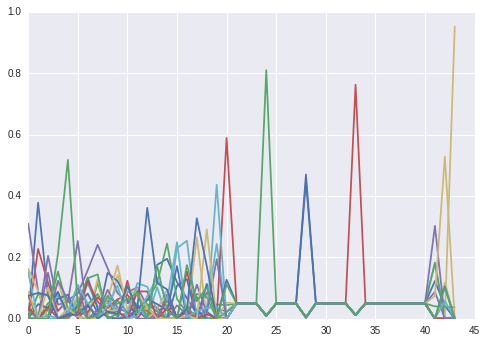

In [16]:
for i in range(len(alldate)):
    plt.plot(range(len(alldate[i])), alldate[i])

In [18]:
binned_cumul = []
for i in range(len(bin_ends)-1):
    binned_cumul.append([])
    for item in test:
        if item[1] < bin_ends[i+1].to_datetime():
            binned_cumul[-1].append(item[0])

In [24]:
binned_docs_cumul=[list(emails_table[emails_table['Id'].isin(binned_cumul[i])]['token_list']) for i in range(len(binned_cumul))]

In [25]:
alldate = [[] for i in range(lda.num_topics)]
for i in range(len(binned_docs_cumul)):
    newP = lda.get_document_topics(dictionary.doc2bow(item for sublist in binned_docs_cumul[i] for item in sublist), .0000000000001)
    for item in newP:
        alldate[item[0]].append(item[1])

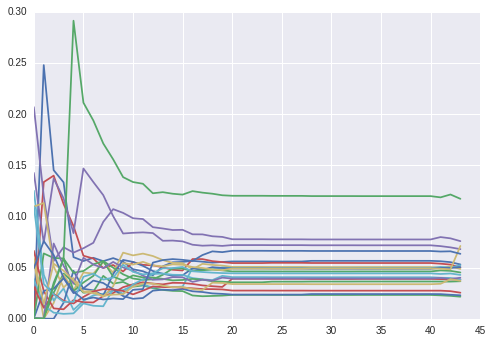

In [26]:
for i in range(len(alldate)):
    plt.plot(range(len(alldate[i])), alldate[i])